In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("homework2_data.csv", na_values=99999)

In [3]:
df.head()

,recid,boro,uf1_1,uf1_2,uf1_3,uf1_4,uf1_5,uf1_6,uf1_7,uf1_8,...,hflag4,hflag18,uf52h_h,uf52h_a,uf52h_b,uf52h_c,uf52h_d,uf52h_e,uf52h_f,uf52h_g
0,1,1,9,9,9,9,1,9,9,9,...,0,0,0,0,0,0,0,0,0,0
1,1,1,9,9,9,9,1,9,9,9,...,0,0,1,1,1,0,0,0,0,0
2,1,1,9,9,9,9,1,9,9,9,...,0,0,1,1,1,0,1,0,1,0
3,1,1,9,9,9,9,1,9,9,9,...,0,0,0,0,0,0,0,0,0,0
4,1,1,9,9,9,9,1,9,9,9,...,0,0,1,0,0,0,1,0,0,0


In [4]:
no_rent = df.uf17.isnull()

In [5]:
df_rent = df[~no_rent]

In [6]:
rent = df_rent.uf17
data = df_rent.drop("uf17", axis=1)
data = data.drop("race1", axis=1)

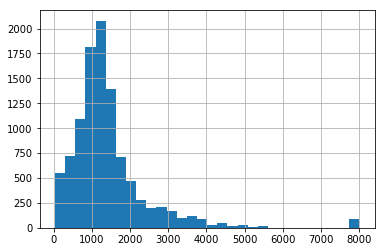

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
rent.hist(bins=30)

In [8]:
non_const_columns = data.var(axis=0) > 0

In [9]:
data.var(axis=0).head()

recid    0.000000
boro     1.128930
uf1_1    0.703268
uf1_2    0.173160
uf1_3    0.451671
dtype: float64

In [10]:
data_ = data[data.columns[non_const_columns]]

In [11]:
data_.shape

(10229, 174)

In [12]:
from sklearn.preprocessing import Imputer
X = Imputer(strategy="median").fit_transform(data_.values)

In [13]:
X.shape

(10229, 174)

In [14]:
rent.values.shape

(10229,)

In [15]:
from sklearn.feature_selection import f_regression
F, p = f_regression(X, rent.values)

In [16]:
import numpy as np

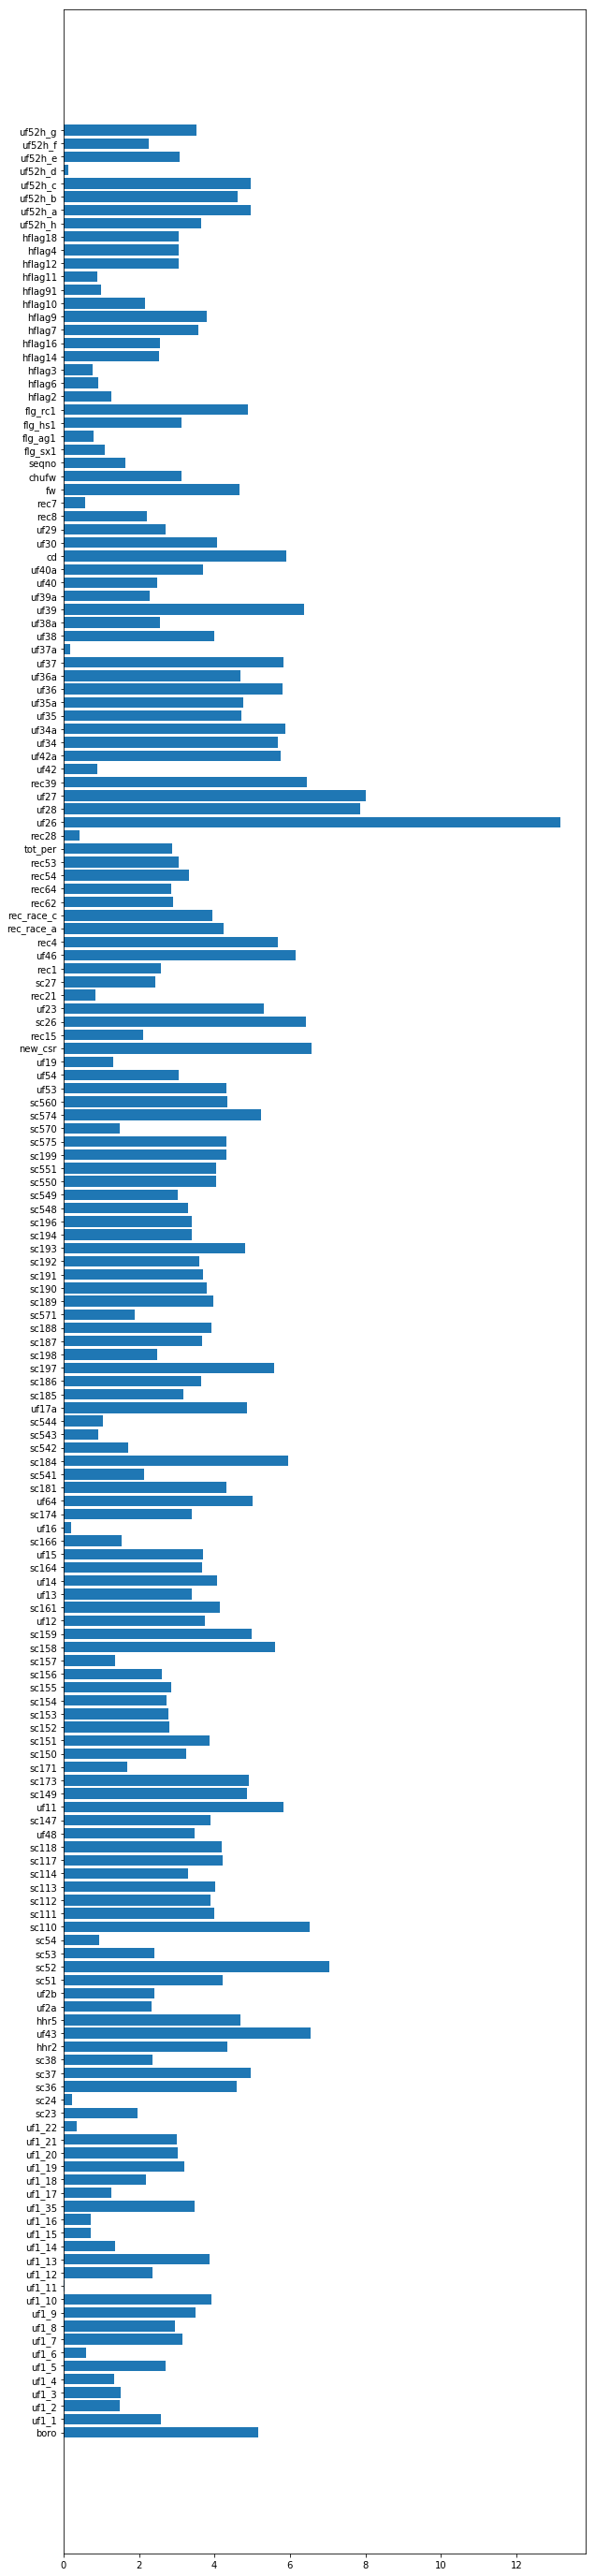

In [17]:
plt.figure(figsize=(10, 50))
plt.barh(np.arange(len(F)), np.log(F + 1))
plt.yticks(np.arange(len(F)), data_.columns);

In [18]:
raw_variables = pd.read_excel("homework2_variable_description.xls", skiprows=4)
# drop repeats of the header
raw_variables = raw_variables[raw_variables['Variable Name'] != "Variable Name"]


In [19]:
raw_variables.head()

,Character Position,Item Number,Item Name,Source Code,Variable Name,Unnamed: 5,Code and Description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Record Type,NaN,NaN,NaN,1=OCCUPIED


In [20]:
variables = raw_variables.dropna(subset=['Variable Name'])
variables.head()

,Character Position,Item Number,Item Name,Source Code,Variable Name,Unnamed: 5,Code and Description
6,2,NaN,Borough,Label,boro,NaN,1=Bronx
12,3-8,D,Condition of External Walls,001,UF1_1,NaN,"Missing bricks, siding, or other outside wall ..."
13,NaN,NaN,NaN,002,UF1_2,NaN,Sloping or bulging outside walls
14,NaN,NaN,NaN,003,UF1_3,NaN,Major cracks in outside walls
15,NaN,NaN,NaN,004,UF1_4,NaN,"Loose or hanging cornice, roofing, or other ma..."


In [21]:
# sometimes two variable names correspond to the same item
# the first variable starts with rec and they are in directly adjacent rows
for i, row in variables.iterrows():
    if i - 1 in variables.index:
        # the row above also has a variable name
        row_above = variables.loc[i-1]
        if row_above['Variable Name'].startswith("REC"):
            # this is one of the culprits
            #print(row)
            #print(row_above)
            # replace UF row with REC row
            variables.loc[i]['Item Name'] = variables.loc[i-1]['Item Name']

In [22]:
mask = variables['Item Name'].isnull()
variables = variables.copy()  # variables is a slice of a dataframe and not a dataframe before this.
variables['Item Name'][mask] = variables['Code and Description'][mask]
variables['Variable Name'] = variables['Variable Name'].str.strip(",").replace("SEX/HHR2", "HHR2")

In [23]:
variables = variables.set_index(variables['Variable Name'].str.lower())
variables.loc['uf43']['Item Name'] = variables.loc['hhr3t']['Item Name'] # manual fix ...
variables.head()

,Character Position,Item Number,Item Name,Source Code,Variable Name,Unnamed: 5,Code and Description
Variable Name,,,,,,,
boro,2,NaN,Borough,Label,boro,NaN,1=Bronx
uf1_1,3-8,D,Condition of External Walls,001,UF1_1,NaN,"Missing bricks, siding, or other outside wall ..."
uf1_2,NaN,NaN,Sloping or bulging outside walls,002,UF1_2,NaN,Sloping or bulging outside walls
uf1_3,NaN,NaN,Major cracks in outside walls,003,UF1_3,NaN,Major cracks in outside walls
uf1_4,NaN,NaN,"Loose or hanging cornice, roofing, or other ma...",004,UF1_4,NaN,"Loose or hanging cornice, roofing, or other ma..."


In [24]:
item_name = variables['Item Name']
item_name.head()

Variable Name
boro                                               Borough
uf1_1                          Condition of External Walls
uf1_2                     Sloping or bulging outside walls
uf1_3                        Major cracks in outside walls
uf1_4    Loose or hanging cornice, roofing, or other ma...
Name: Item Name, dtype: object

In [25]:
source_codes = raw_variables.dropna(subset=['Source Code']).copy()
source_codes['Source Code'] = source_codes['Source Code'].astype("str").str.lstrip("0")
source_codes = source_codes.drop_duplicates(subset=["Source Code"])

In [26]:
sc_reindex = source_codes.set_index("sc" + source_codes['Source Code'])

In [27]:
source_code_series = sc_reindex['Item Name']

In [32]:
feature_mapping = {}
for c in data_.columns:
    if c in item_name.index:
        feature_mapping[c] = item_name.loc[c]
    elif c in source_code_series.index:
        feature_mapping[c] = source_code_series.loc[c]
    else:
        print(c)
feature_mapping['seqno'] = "seqno"

seqno


In [29]:
data_desc = data_.rename_axis(item_name, axis=1)
data_desc = data_desc.rename_axis(source_code_series, axis=1)

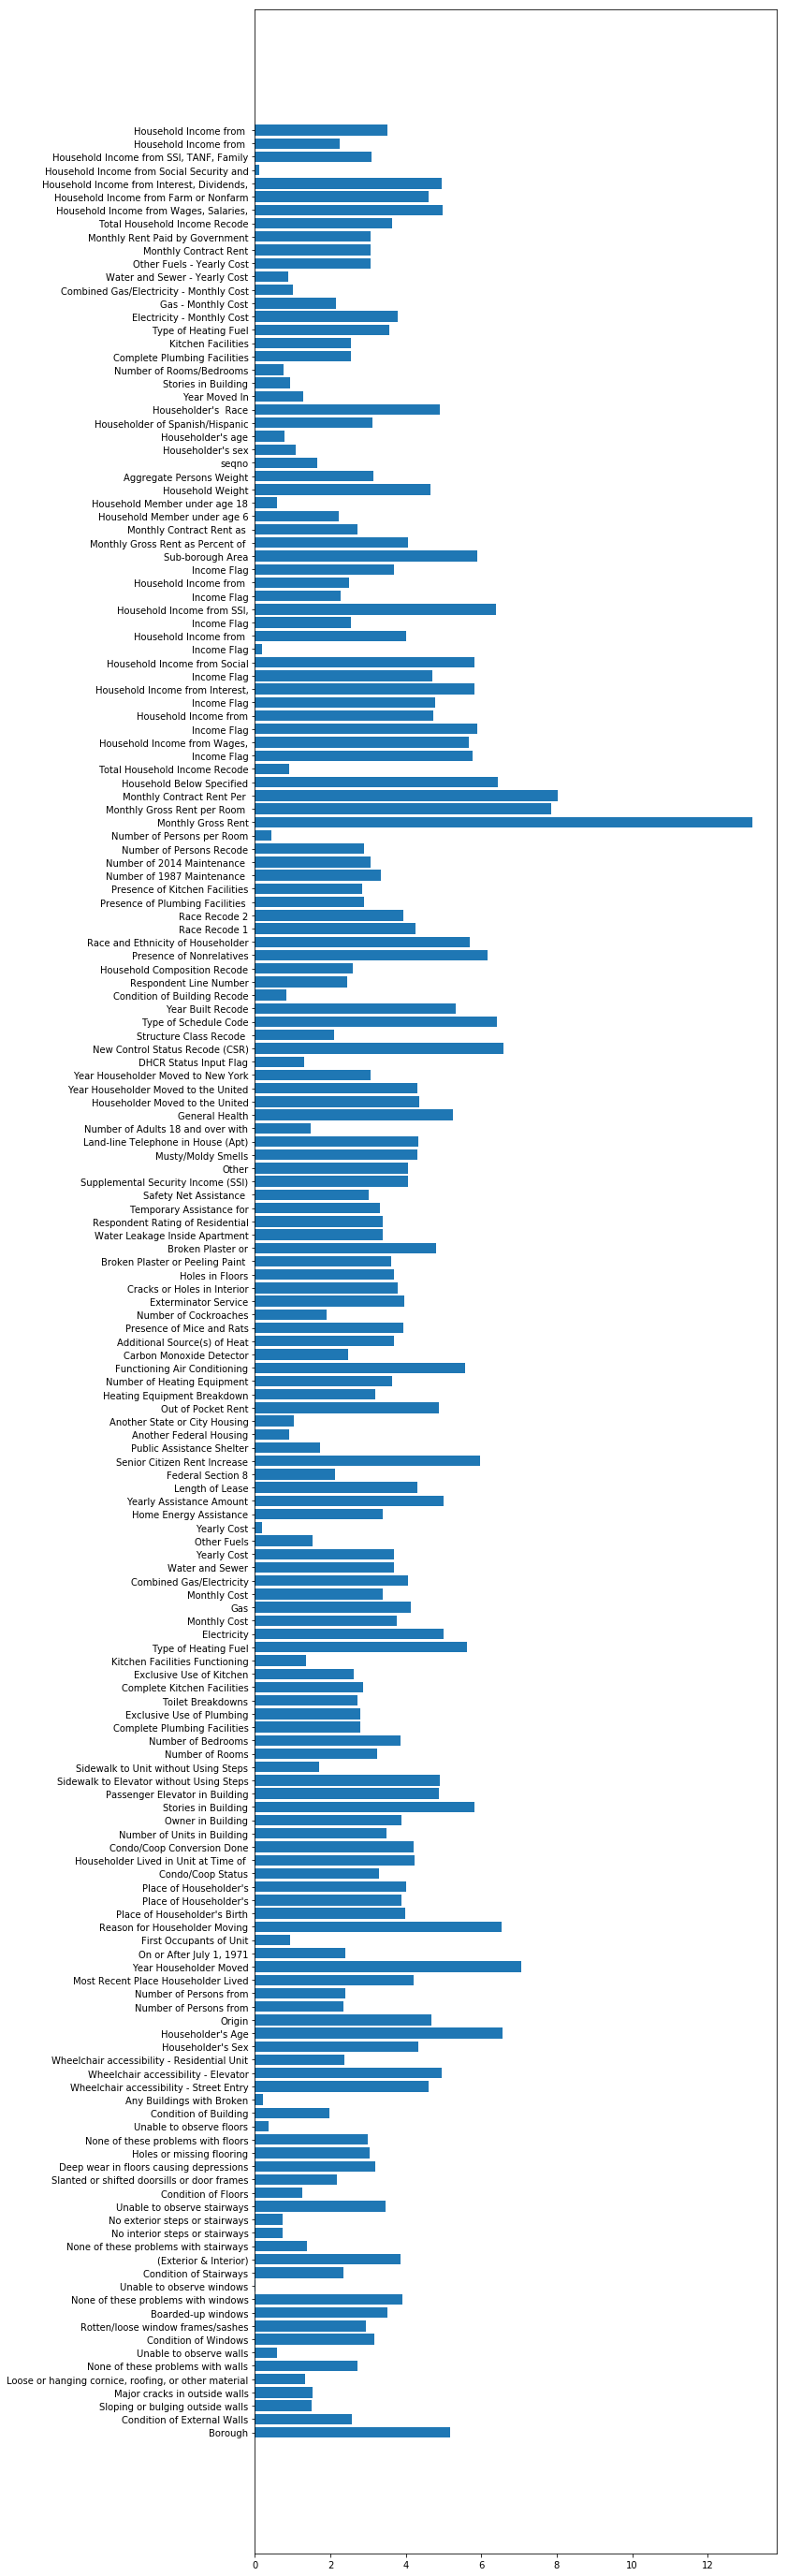

In [30]:
plt.figure(figsize=(10, 50))
plt.barh(np.arange(len(F)), np.log(F + 1))
plt.yticks(np.arange(len(F)), data_desc.columns);

In [126]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, rent.values)
inds = np.argsort(mi)


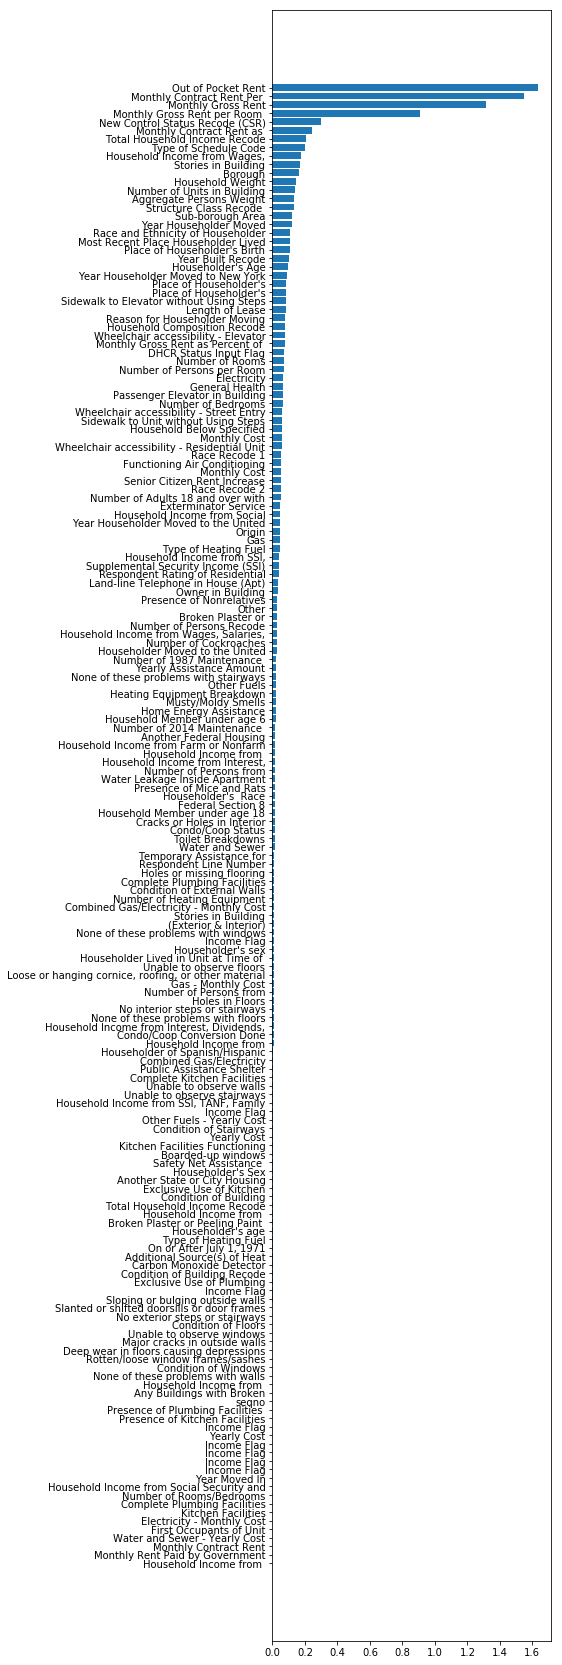

In [36]:
plt.figure(figsize=(5, 30))
plt.barh(np.arange(len(mi)), np.log(mi[inds] + 1))
plt.yticks(np.arange(len(mi)), map(lambda x: feature_mapping[x], data_.columns[inds]));

In [31]:
np.where(data_desc.columns == "Kitchen Facilities Functioning")

(array([58]),)

In [39]:
non_renter_columns = data_.columns[:58 + 1]
non_renter_columns = [i for i in non_renter_columns if "Householder" not in feature_mapping[i] and "Number of Persons from" not in feature_mapping[i] and "Origin" not in feature_mapping[i]]
non_renter_columns += ["new_csr"]

In [40]:
data_nr = data_[non_renter_columns]

In [41]:
X = Imputer(strategy="median").fit_transform(data_nr.values)
F, p = f_regression(X, rent.values)

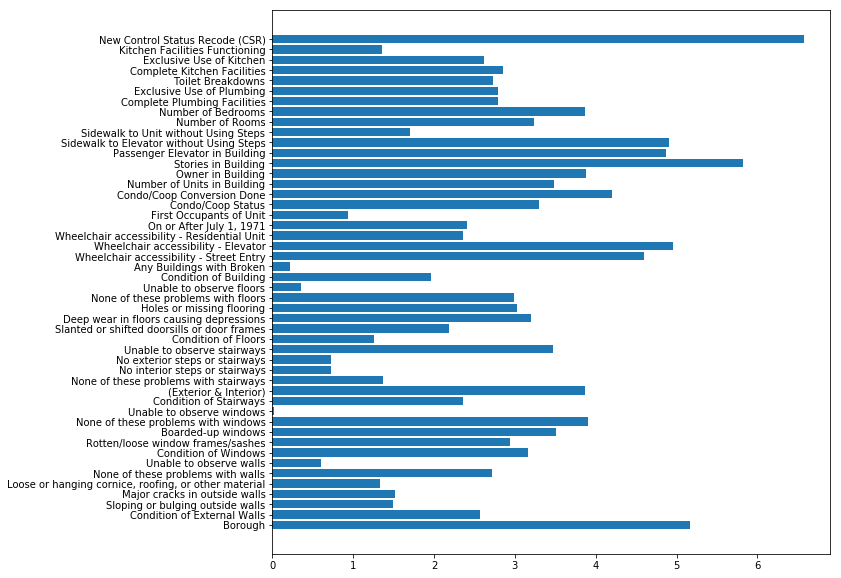

In [42]:
plt.figure(figsize=(10, 10))
plt.barh(np.arange(len(F)), np.log(F + 1))
plt.yticks(np.arange(len(F)), map(lambda x: feature_mapping[x], data_nr.columns));

In [43]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, rent.values)

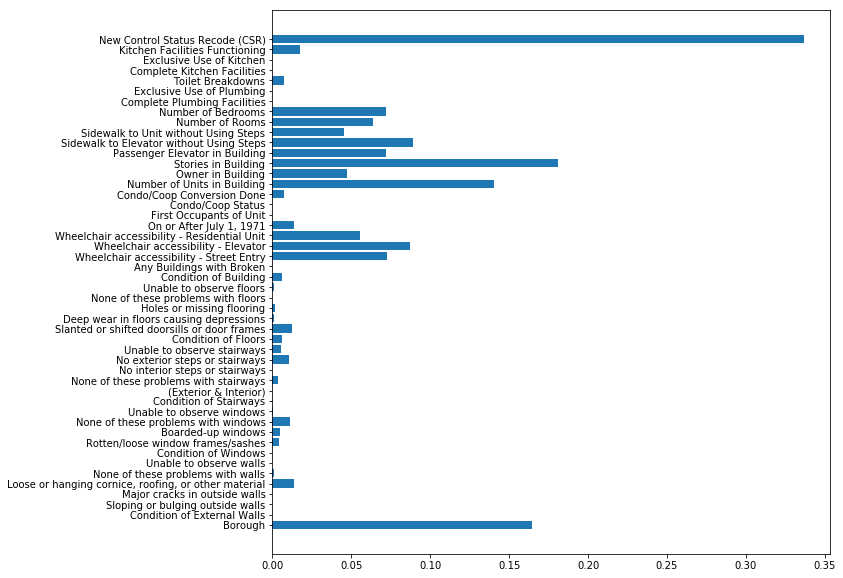

In [44]:
plt.figure(figsize=(10, 10))
plt.barh(np.arange(len(mi)), mi)
plt.yticks(np.arange(len(mi)), map(lambda x: feature_mapping[x], data_nr.columns));

In [127]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(mutual_info_regression, percentile=50)

In [128]:
select.fit(X, rent.values)

1 loop, best of 3: 13.9 s per loop


In [47]:
feature_names = [feature_mapping[x] for x in data_nr.columns[select.get_support()]]
feature_names

['Borough',
 'Sloping or bulging outside walls',
 'Loose or hanging cornice, roofing, or other material',
 'None of these problems with walls',
 'Condition of Stairways',
 '(Exterior & Interior)',
 'Condition of Floors',
 'None of these problems with floors',
 'Any Buildings with Broken',
 'Wheelchair accessibility - Street Entry',
 'Wheelchair accessibility - Elevator',
 'Wheelchair accessibility - Residential Unit',
 'Condo/Coop Status',
 'Condo/Coop Conversion Done',
 'Number of Units in Building',
 'Owner in Building',
 'Stories in Building',
 'Passenger Elevator in Building',
 'Sidewalk to Elevator without Using Steps',
 'Sidewalk to Unit without Using Steps',
 'Number of Rooms',
 'Number of Bedrooms',
 'Complete Kitchen Facilities',
 'New Control Status Recode (CSR)']

In [48]:
X_selected = select.transform(X)

In [49]:
len(feature_names)

24

In [50]:
y = rent.values

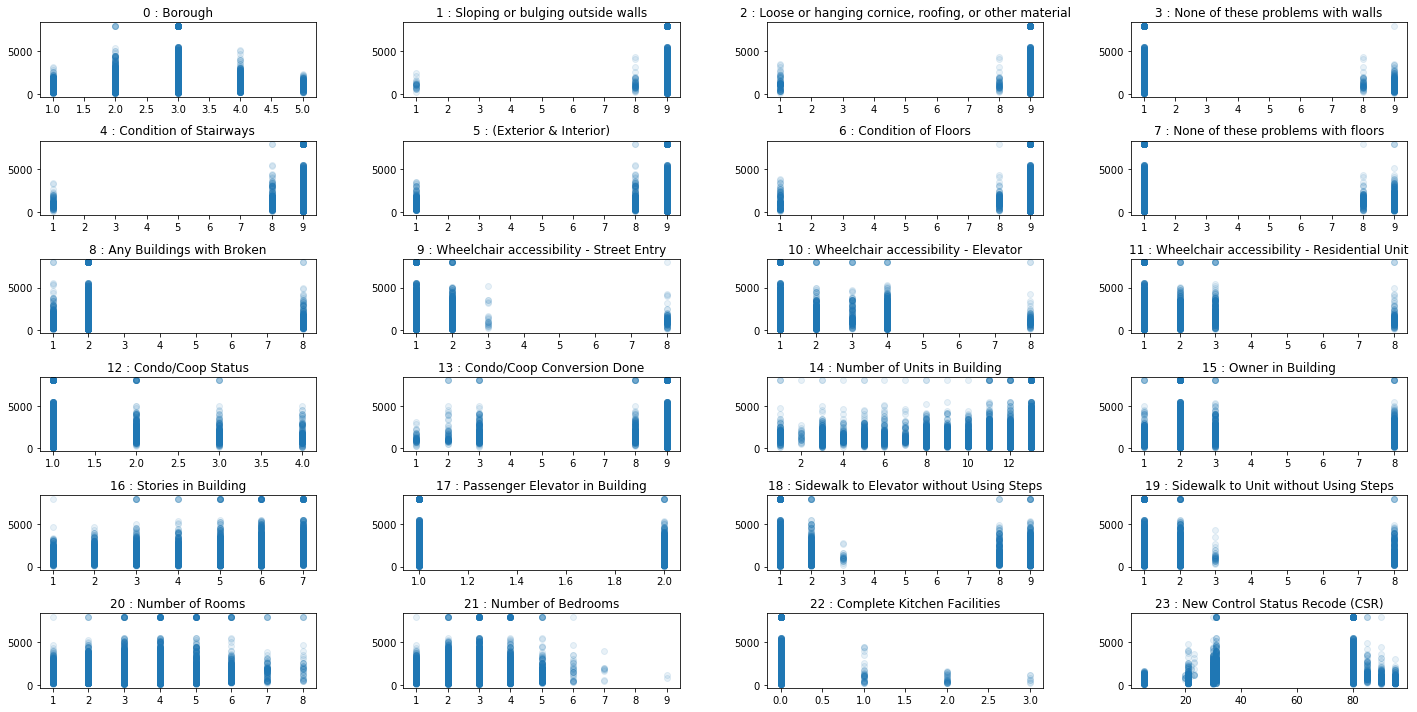

In [51]:
fig, axes = plt.subplots(6, 4, figsize=(20, 10))
for i, (name, ax) in enumerate(zip(feature_names, axes.ravel())):
    ax.scatter(X_selected[:, i], y, alpha=.1)
    ax.set_title("{} : {}".format(i, name))
plt.tight_layout()

In [52]:
X.shape

(10229, 48)

In [53]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(X_selected, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
rf.score(X_val, y_val)

0.48381168331671154

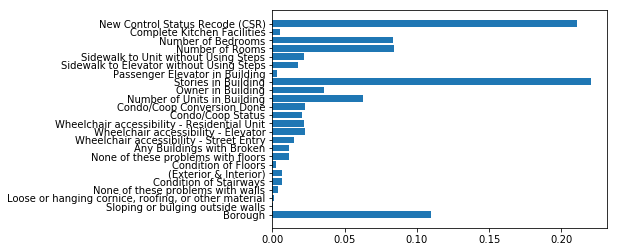

In [56]:
plt.barh(range(X_train.shape[1]), rf.feature_importances_)
plt.yticks(range(X_train.shape[1]), feature_names);

In [57]:
from sklearn.linear_model import LinearRegression
LinearRegression().fit(X_train, y_train).score(X_val, y_val)

0.19175056348682673

In [58]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_val, y_val)

0.19175056348682673

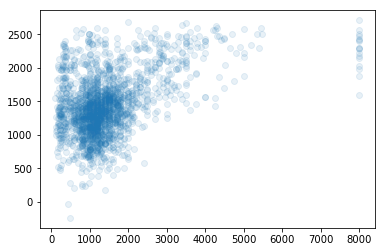

In [59]:
plt.scatter(y_val, lr.predict(X_val), alpha=.1)

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(X_train)

In [61]:
from sklearn.pipeline import make_pipeline
ohe_pipe = make_pipeline(OneHotEncoder(), LinearRegression())
ohe_pipe.fit(X_train, y_train).score(X_val, y_val)

0.48707157410770474

In [62]:
feature_names

['Borough',
 'Sloping or bulging outside walls',
 'Loose or hanging cornice, roofing, or other material',
 'None of these problems with walls',
 'Condition of Stairways',
 '(Exterior & Interior)',
 'Condition of Floors',
 'None of these problems with floors',
 'Any Buildings with Broken',
 'Wheelchair accessibility - Street Entry',
 'Wheelchair accessibility - Elevator',
 'Wheelchair accessibility - Residential Unit',
 'Condo/Coop Status',
 'Condo/Coop Conversion Done',
 'Number of Units in Building',
 'Owner in Building',
 'Stories in Building',
 'Passenger Elevator in Building',
 'Sidewalk to Elevator without Using Steps',
 'Sidewalk to Unit without Using Steps',
 'Number of Rooms',
 'Number of Bedrooms',
 'Complete Kitchen Facilities',
 'New Control Status Recode (CSR)']

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoLarsCV, Lars, Ridge, LassoLars
from sklearn.feature_selection import VarianceThreshold

ohe_interactions_pipe = make_pipeline(OneHotEncoder(sparse=False), PolynomialFeatures(interaction_only=True), VarianceThreshold(),
                                      RidgeCV())
ohe_interactions_pipe.fit(X_train, y_train).score(X_val, y_val)

0.53121451344346471

In [57]:
# converting the interactions to a sparse matrix is slightly faster
# - or not!
# ohe_interactions_pipe = make_pipeline(OneHotEncoder(sparse=False), PolynomialFeatures(),
#                                      FunctionTransformer(lambda X: sp.csr_matrix(X)), RidgeCV())
#ohe_interactions_pipe.fit(X_train, y_train).score(X_val, y_val)

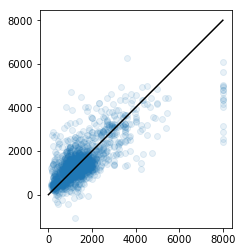

In [64]:
plt.scatter(y_val, ohe_interactions_pipe.predict(X_val), alpha=.1)
plt.gca().set_aspect("equal")
plt.plot([0, 8000], [0, 8000], c='k')

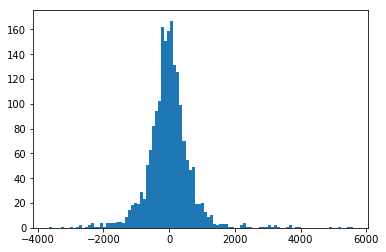

In [65]:
plt.hist(y_val - ohe_interactions_pipe.predict(X_val), bins=100);

In [66]:
from sklearn.feature_selection import VarianceThreshold
ohe_interactions_trans = make_pipeline(OneHotEncoder(sparse=False), PolynomialFeatures(include_bias=False, interaction_only=True), VarianceThreshold())
X_expanded = ohe_interactions_trans.fit_transform(X_train)

In [67]:
X_expanded.shape

(5753, 5496)

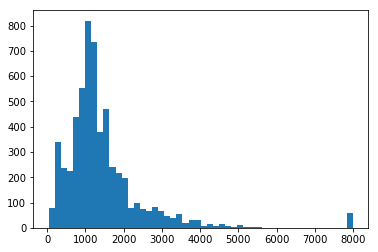

In [68]:
plt.hist(y_train, bins=50);

In [69]:
y_train.max()

7999.0

In [70]:
np.sum(y_train == y_train.max()) / len(y_train)

0.01025551885972536

In [71]:
y[y > 7000]

array([ 7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,  7999.,
        7999.,  7999.,  7999.])

In [72]:
# Drop 7999 as we can't learn anything from that
X_selected_ = X_selected[y<7999]
y_ = y[y<7999]
X_trainval, X_test, y_trainval, y_test = train_test_split(X_selected_, y_, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

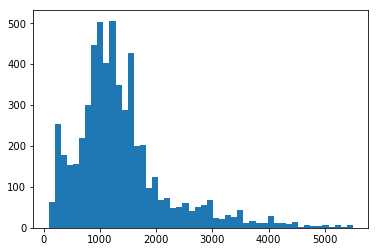

In [73]:
plt.hist(y_train, bins=50);

In [74]:
ohe_interactions_pipe = make_pipeline(OneHotEncoder(sparse=False), PolynomialFeatures(interaction_only=True), VarianceThreshold(),
                                      RidgeCV())
ohe_interactions_pipe.fit(X_train, y_train).score(X_val, y_val)

0.4963463541647703

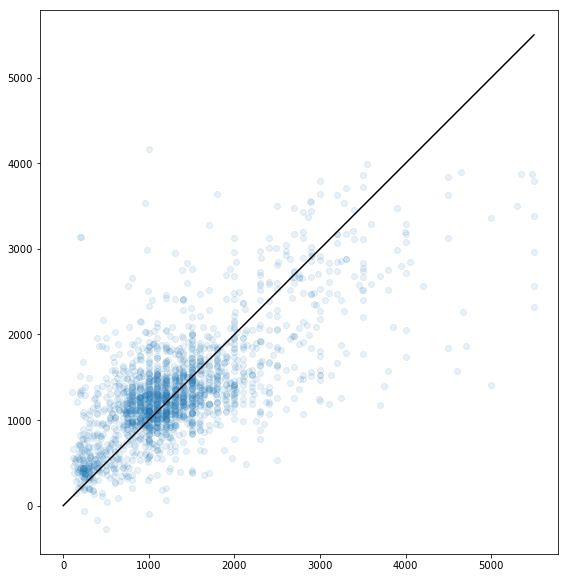

In [75]:
plt.figure(figsize=(10, 10))
plt.scatter(y_val, ohe_interactions_pipe.predict(X_val), alpha=.1)
plt.gca().set_aspect("equal")
plt.plot([0, y_val.max()], [0, y_val.max()], c='k')

In [76]:
from scipy.stats import boxcox

In [77]:
y_train_bc, l = boxcox(y_train)

In [78]:
l

0.27085608209529133

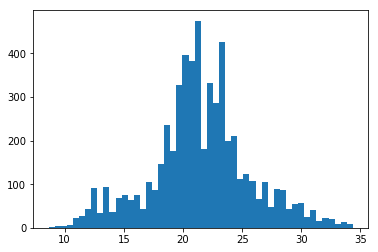

In [79]:
plt.hist(y_train_bc, bins=50);

In [80]:
1 / l

3.6919975813878332

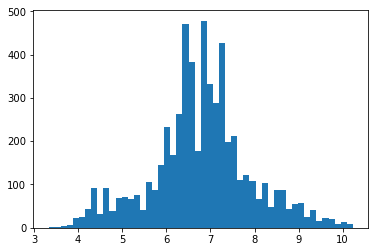

In [81]:
plt.hist(y_train ** .27, bins=50);

In [82]:
ohe_interactions_pipe = make_pipeline(OneHotEncoder(sparse=False), PolynomialFeatures(interaction_only=True), VarianceThreshold(),
                                      RidgeCV())
ohe_interactions_pipe.fit(X_train, y_train ** .27).score(X_val, y_val ** .27)

0.50961134641247385

In [83]:
from sklearn.metrics import r2_score
r2_score(y_val, ohe_interactions_pipe.predict(X_val) ** (1/.27))

0.48752395158721062

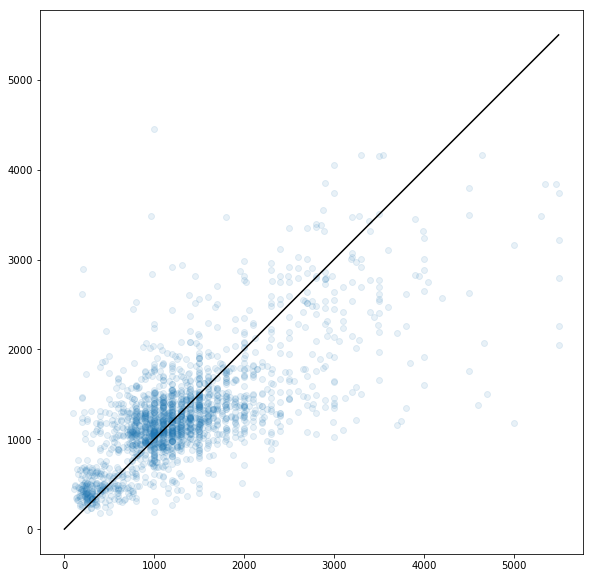

In [84]:
plt.figure(figsize=(10, 10))
plt.scatter(y_val, ohe_interactions_pipe.predict(X_val)** (1/.27), alpha=.1)
plt.gca().set_aspect("equal")
plt.plot([0, y_val.max()], [0, y_val.max()], c='k')

In [85]:
grr = pd.DataFrame(X_selected_.astype(np.int), columns=data_nr.columns[select.get_support()])
df_dummies = pd.get_dummies(grr, columns=grr.columns, prefix_sep="$")

In [86]:
X_dummies_ = df_dummies.values
X_trainval, X_test, y_trainval, y_test = train_test_split(X_dummies_, y_, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

In [87]:
alphas = np.logspace(-3, 2, 11)
alphas

array([  1.00000000e-03,   3.16227766e-03,   1.00000000e-02,
         3.16227766e-02,   1.00000000e-01,   3.16227766e-01,
         1.00000000e+00,   3.16227766e+00,   1.00000000e+01,
         3.16227766e+01,   1.00000000e+02])

In [88]:
ridge = RidgeCV(alphas=alphas, store_cv_values=True).fit(X_train, y_train)

In [89]:
ridge.score(X_val, y_val)

0.48945173330267927

In [90]:
ridge.alpha_

3.1622776601683795

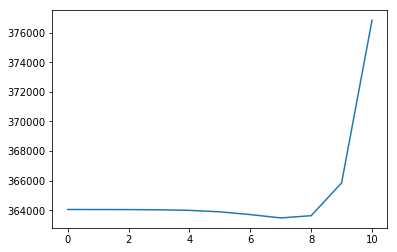

In [91]:
plt.plot(ridge.cv_values_.mean(axis=0))

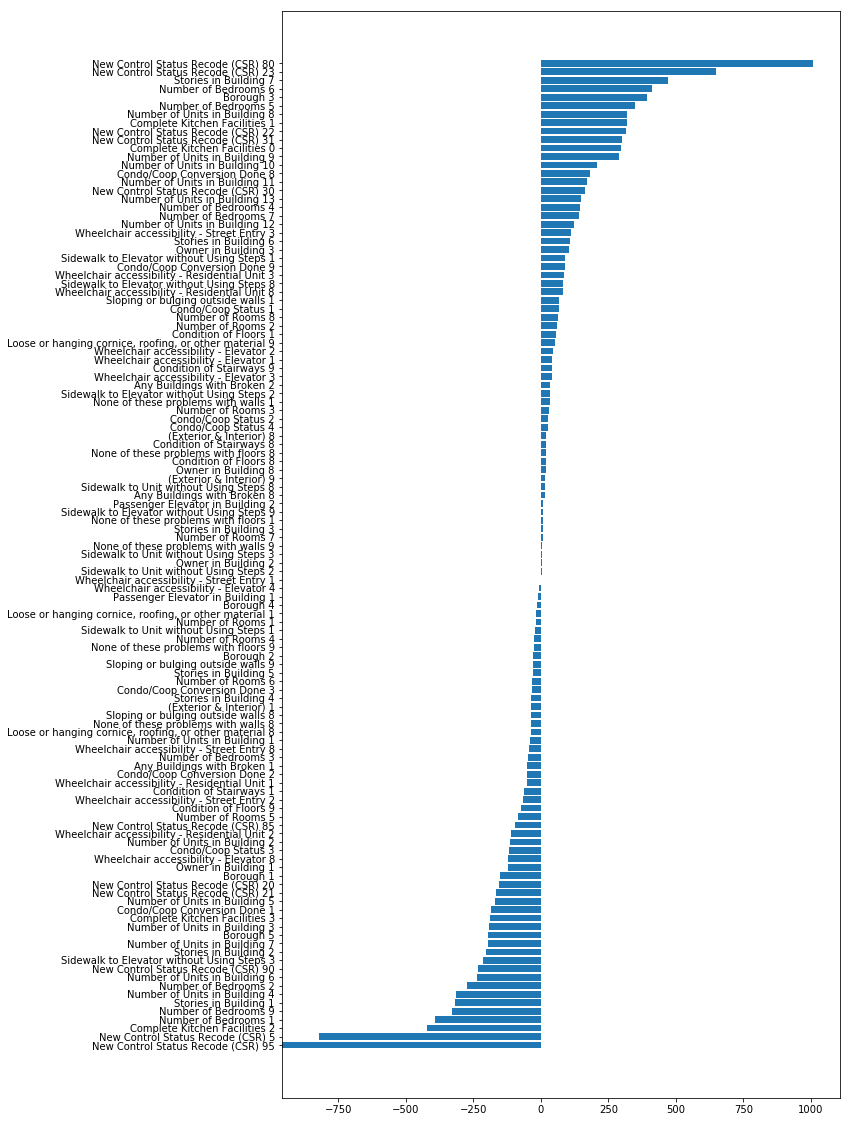

In [92]:
plt.figure(figsize=(10, 20))
inds = np.argsort(ridge.coef_)
plt.barh(range(len(inds)), ridge.coef_[inds])
plt.yticks(range(len(inds)), [feature_mapping[x.split("$")[0]] + " " + x.split("$")[1] for x in df_dummies.columns[inds]]);

In [99]:
ridge = RidgeCV().fit(X_train, y_train ** l)

In [100]:
r2_score(y_val, ridge.predict(X_val) ** (1/l))

0.49211321629020266

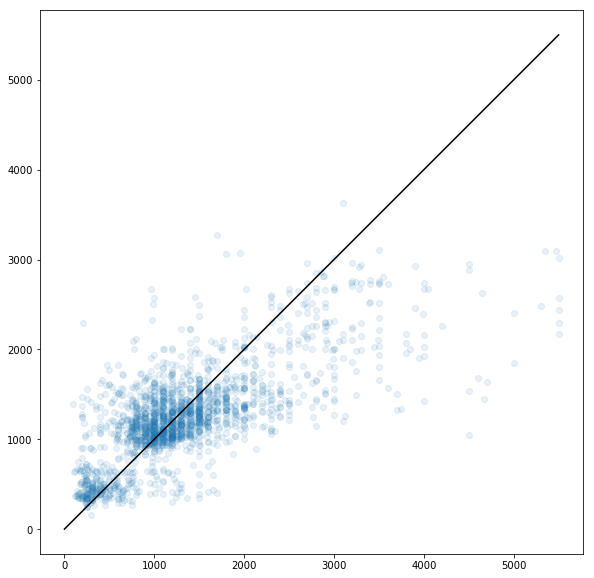

In [101]:
plt.figure(figsize=(10, 10))
plt.scatter(y_val, ridge.predict(X_val) ** (1/l), alpha=.1)
plt.gca().set_aspect("equal")
plt.plot([0, y_val.max()], [0, y_val.max()], c='k')

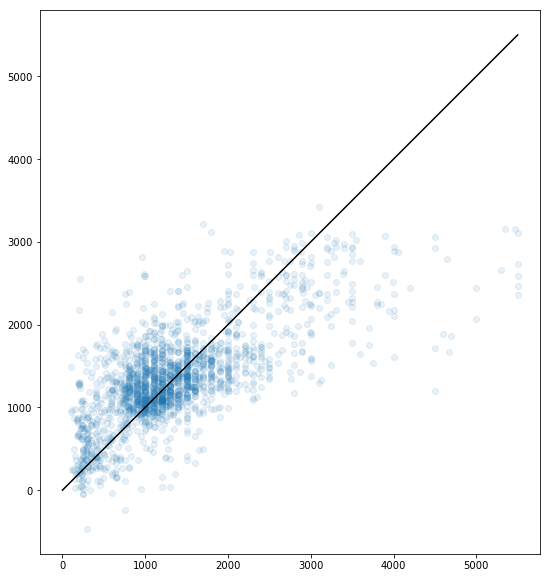

In [102]:
ridge = RidgeCV().fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plt.scatter(y_val, ridge.predict(X_val), alpha=.1)
plt.gca().set_aspect("equal")
plt.plot([0, y_val.max()], [0, y_val.max()], c='k')

In [97]:
data_['new_csr'].value_counts()

80    3658
30    3533
31    1221
5      858
95     422
85     217
21     164
90     132
23      10
20      10
22       4
Name: new_csr, dtype: int64

In [104]:
df_dummies.columns

Index(['boro$1', 'boro$2', 'boro$3', 'boro$4', 'boro$5', 'uf1_2$1', 'uf1_2$8',
       'uf1_2$9', 'uf1_4$1', 'uf1_4$8',
       ...
       'new_csr$20', 'new_csr$21', 'new_csr$22', 'new_csr$23', 'new_csr$30',
       'new_csr$31', 'new_csr$80', 'new_csr$85', 'new_csr$90', 'new_csr$95'],
      dtype='object', length=117)

In [109]:
y_[(df_dummies['new_csr$80'] == 1).values]

array([ 1500.,   750.,  1650., ...,  1500.,   700.,   650.])

In [110]:
# only keep non-rent regulated
X_dummies_ = df_dummies[df_dummies['new_csr$80'] == 1].values
X_trainval, X_test, y_trainval, y_test = train_test_split(X_dummies_, y_[(df_dummies['new_csr$80'] == 1).values], random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

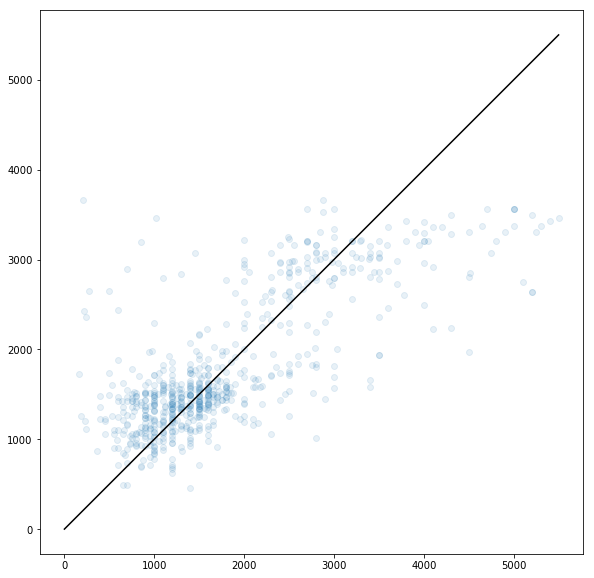

In [111]:
ridge = RidgeCV().fit(X_train, y_train)

plt.figure(figsize=(10, 10))
plt.scatter(y_val, ridge.predict(X_val), alpha=.1)
plt.gca().set_aspect("equal")
plt.plot([0, y_val.max()], [0, y_val.max()], c='k')

In [112]:
ridge.score(X_train, y_train)

0.59457443368995599

In [113]:
ridge.score(X_val, y_val)

0.58135937047531328

In [ ]:
ridge.coef_

In [ ]:
asdf = make

In [121]:
asdf = make_pipeline(PolynomialFeatures(interaction_only=True), VarianceThreshold(), RidgeCV(alphas=np.logspace(0, 4, 8)))
asdf.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=True)), ('variancethreshold', VarianceThreshold(threshold=0.0)), ('ridgecv', RidgeCV(alphas=array([  1.00000e+00,   3.72759e+00,   1.38950e+01,   5.17947e+01,
         1.93070e+02,   7.19686e+02,   2.68270e+03,   1.00000e+04]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False))])

In [122]:
asdf.named_steps['ridgecv'].alpha_

193.06977288832496

In [123]:
asdf.score(X_train, y_train)

0.66216874235517531

In [124]:
asdf.score(X_val, y_val)

0.58103571982054314

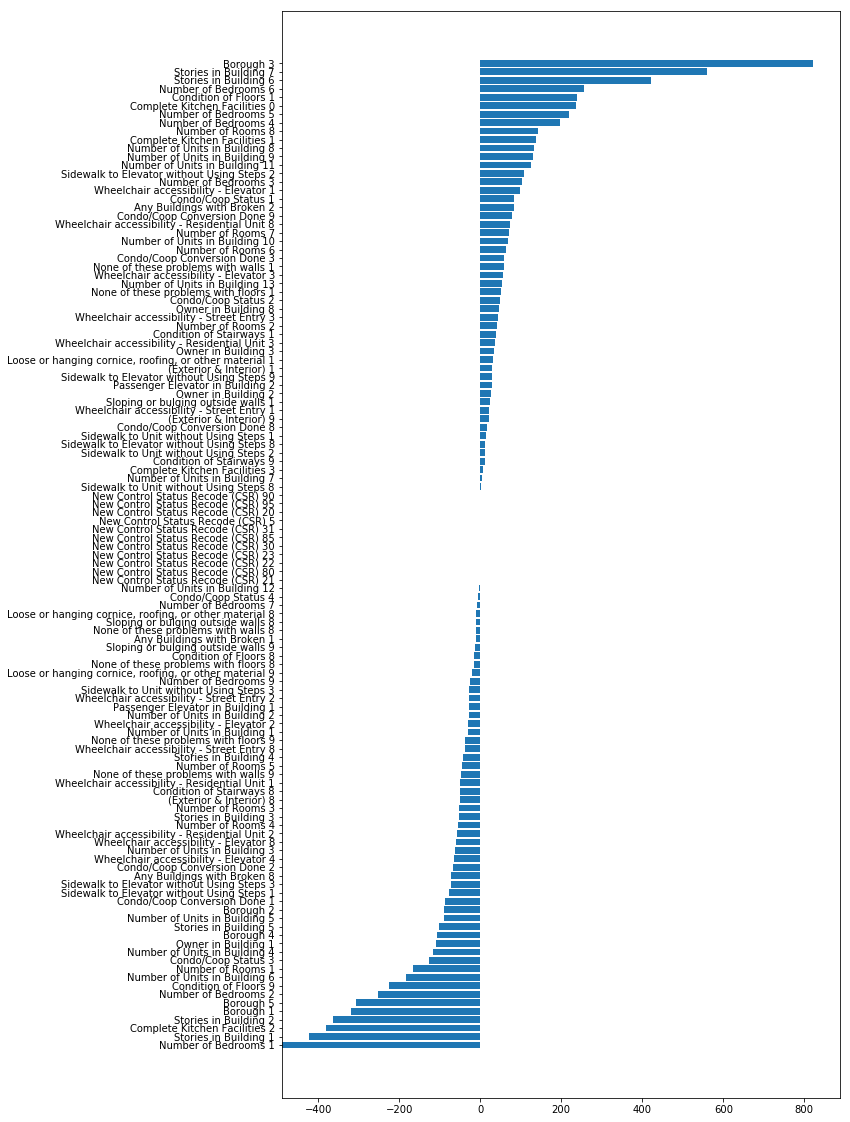

In [125]:
plt.figure(figsize=(10, 20))
inds = np.argsort(ridge.coef_)
plt.barh(range(len(inds)), ridge.coef_[inds])
plt.yticks(range(len(inds)), [feature_mapping[x.split("$")[0]] + " " + x.split("$")[1] for x in df_dummies.columns[inds]]);